In [1]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

113


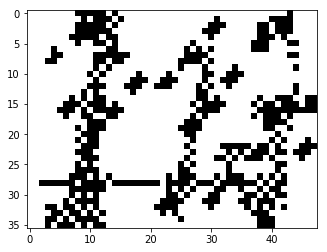

1


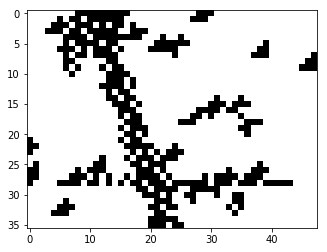

8


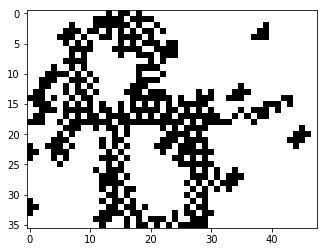

345


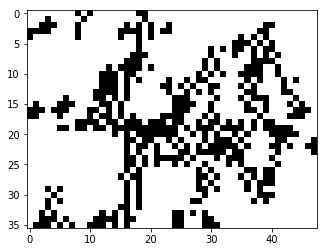

969


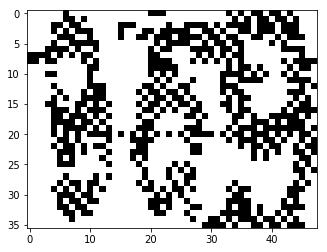

9


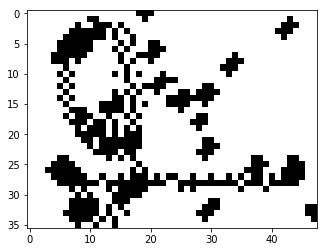

166


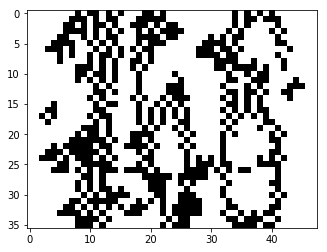

4404


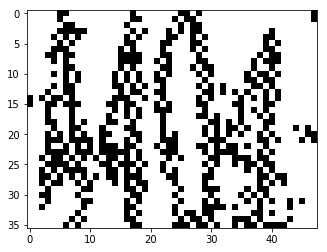

566


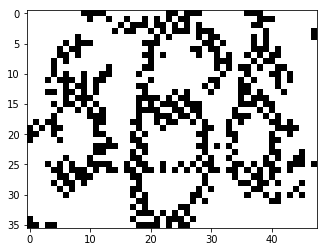

677


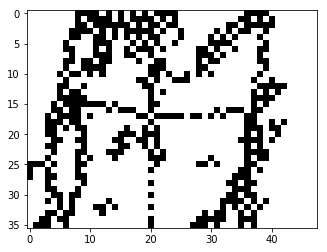

707


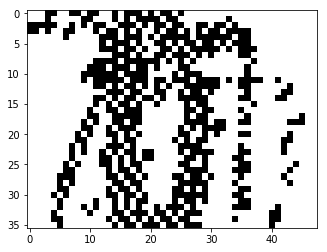

865


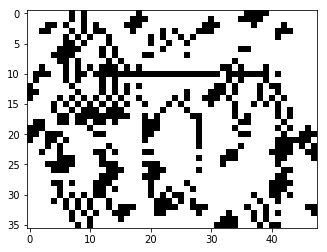

5210


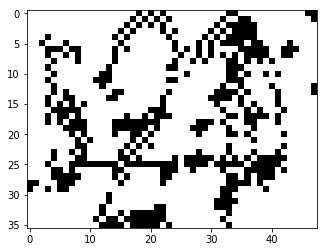

5


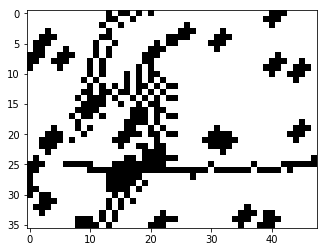

2758


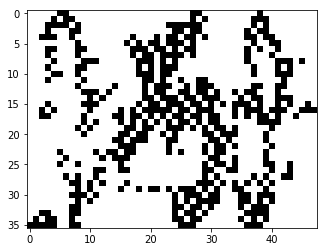

87


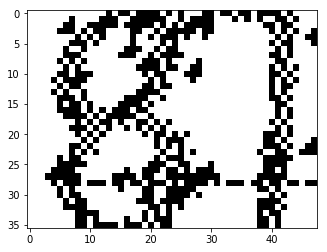

23


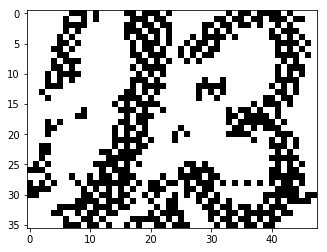

1


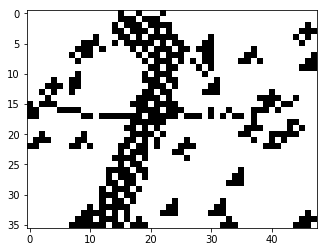

922


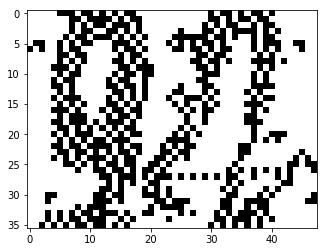

38


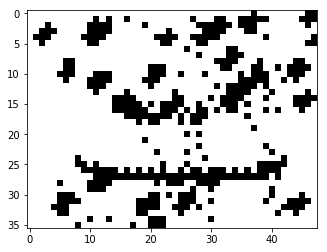

8


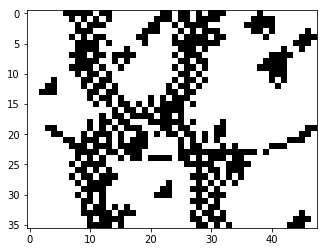

8


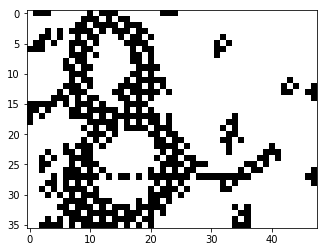

804


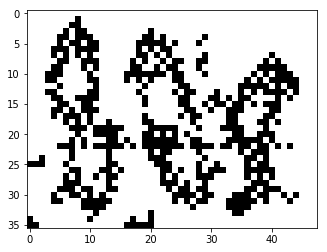

2954


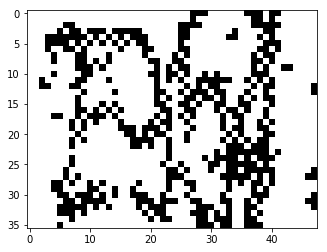

9


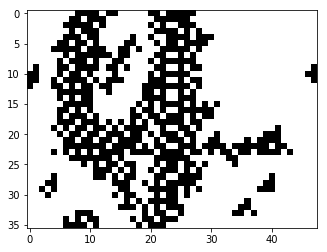

In [2]:
def read_and_decode(filename):
    #根据文件名生成一个队列
    filename_queue = tf.train.string_input_producer([filename])

    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)   #返回文件名和文件
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string),
                                       })

    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.cast(img,tf.float64)

    img = tf.reshape(img, [36, 48])
#     img = tf.split(img,3,2)[0]
    label = tf.cast(features['label'], tf.int32)
    img_batch, label_batch = tf.train.shuffle_batch([img, label],
                                                batch_size=64, capacity=2000,
                                                min_after_dequeue=1000)
    return img_batch,label_batch


img, label = read_and_decode("train_1.tfrecord")


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    for i in range(5):
        val ,l = sess.run([img,label])
        for i in range(5):
            plt.imshow(val[i].reshape(36,48),cmap="gray")
            print(l[i]) 
            plt.show()
    coord.request_stop()  
    coord.join(threads)  
    sess.close()   


In [37]:
def read_and_decode1(filename):
    #根据文件名生成一个队列
    filename_queue = tf.train.string_input_producer([filename])

    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)   #返回文件名和文件
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string),
                                       })

    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.cast(img,tf.float64)

    img = tf.reshape(img, [36, 48])
    print(img)
    label = tf.cast(features['label'], tf.int32)
    return img,label


img, label = read_and_decode1("train_1.tfrecord")
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    for i in range(5):
        l = sess.run([label])
        print(l[i]) 
    coord.request_stop()  
    coord.join(threads)  
    sess.close()   


Tensor("Reshape_33:0", shape=(36, 48), dtype=float64)
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>, Input to reshape is a tensor with 216 values, but the requested shape has 5184
	 [[Node: Reshape = Reshape[T=DT_DOUBLE, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](Cast, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/haiyang/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/haiyang/venv/lib/python3.6/site-packa

OutOfRangeError: FIFOQueue '_854_input_producer_33' is closed and has insufficient elements (requested 1, current size 0)
	 [[Node: ReaderReadV2_33 = ReaderReadV2[_device="/job:localhost/replica:0/task:0/cpu:0"](TFRecordReaderV2_33, input_producer_33)]]

Caused by op 'ReaderReadV2_33', defined at:
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/haiyang/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/haiyang/venv/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/haiyang/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/haiyang/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/haiyang/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/haiyang/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/haiyang/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/haiyang/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/haiyang/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-114d26668bd7>", line 22, in <module>
    img, label = read_and_decode1("train_1.tfrecord")
  File "<ipython-input-37-114d26668bd7>", line 6, in read_and_decode1
    _, serialized_example = reader.read(filename_queue)   #返回文件名和文件
  File "/home/haiyang/venv/lib/python3.6/site-packages/tensorflow/python/ops/io_ops.py", line 191, in read
    return gen_io_ops._reader_read_v2(self._reader_ref, queue_ref, name=name)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 410, in _reader_read_v2
    queue_handle=queue_handle, name=name)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/haiyang/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

OutOfRangeError (see above for traceback): FIFOQueue '_854_input_producer_33' is closed and has insufficient elements (requested 1, current size 0)
	 [[Node: ReaderReadV2_33 = ReaderReadV2[_device="/job:localhost/replica:0/task:0/cpu:0"](TFRecordReaderV2_33, input_producer_33)]]


In [27]:
tf.split?